### 第二次作業
#### 105208077 經濟四 涂育賢

### 主要改動
#### 將全連結層改為兩層，分別為80,40個神經元
#### 將loss函數由'mse'改成'categorical_crossentropy'，適用標籤為多類模式
#### optinizer 改成 adam (由於SGD的learning rate很難選擇適合的，所以採用較熱門的adam)

### 引入模型

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

### 讀取資料集

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(60000,28,28,1)/255
x_test = x_test.reshape(10000,28,28,1)/255

In [6]:
y_train = to_categorical(y_train,10) 
y_test = to_categorical(y_test,10) 

### 建立神經網路
#### 選擇三層CNN架構
####  卷基層分別有16, 32, 64個filter
####  池化層將圖片縮小尺寸為原本的$ \frac{1}{2} $

In [7]:
model = Sequential()

In [8]:
#第一層CNN
model.add(Conv2D(16,(3,3),padding = 'same',
                input_shape = (28,28,1),
                activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#第二層CNN
model.add(Conv2D(32,(3,3),padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
#第三層CNN
model.add(Conv2D(64,(3,3),padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
#拉平
model.add(Flatten())
#全連結層
model.add(Dense(80,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

### 將loss函數由'mse'改成'categorical_crossentropy'，適用標籤為多類模式。
### optinizer 改成 adam (由於SGD的learning rate很難選擇適合的，所以採用較熱門的adam)

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

### batch_size 為 100 ; epochs 為 10

In [13]:
train_history2 = model.fit(x_train, y_train, validation_split = (1/6), batch_size = 100, epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 247us/sample - loss: 0.3059 - accuracy: 0.9052 - val_loss: 0.0760 - val_accuracy: 0.9782
Epoch 2/10
50000/50000 [==============================] - 12s 236us/sample - loss: 0.0782 - accuracy: 0.9752 - val_loss: 0.0585 - val_accuracy: 0.9821
Epoch 3/10
50000/50000 [==============================] - 12s 238us/sample - loss: 0.0523 - accuracy: 0.9837 - val_loss: 0.0624 - val_accuracy: 0.9842
Epoch 4/10
50000/50000 [==============================] - 12s 238us/sample - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0515 - val_accuracy: 0.9841
Epoch 5/10
50000/50000 [==============================] - 12s 239us/sample - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0498 - val_accuracy: 0.9859
Epoch 6/10
50000/50000 [==============================] - 12s 243us/sample - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0394 - val_accuracy: 0.9890
Epoch 7/10
50000/50000 [====================

### 透過圖可以看到整體來說，訓練過程算是沒有overfitting

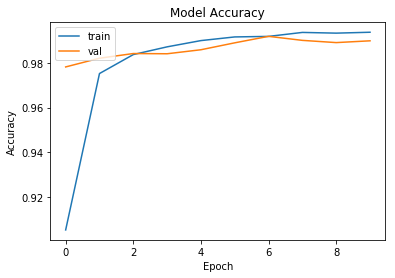

In [14]:
plt.plot(train_history2.history['accuracy'])
plt.plot(train_history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

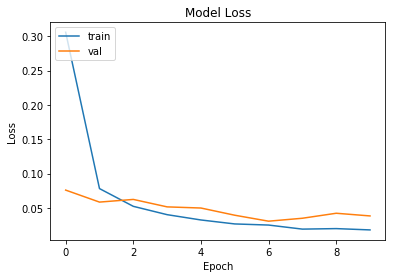

In [16]:
plt.plot(train_history2.history['loss'])
plt.plot(train_history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

### 檢視模型跑測試集結果

In [17]:
score1 = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.0291 - accuracy: 0.9903


In [22]:
loss1, acc1 = score1
print('預測準確率為：',acc1)
print('預測偏誤率為：',round(loss1,4))

預測準確率為： 0.9903
預測偏誤率為： 0.0291


### 小結：準確率、偏誤率有點太高，主要參數幾乎沒改，推測使用不同loss函數及optimizer是主因。

### 參考資料

#### https://keras.io/zh/visualization/
#### https://hackmd.io/@allen108108/rkn-oVGA4
#### https://medium.com/@chih.sheng.huang821/%E5%8D%B7%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-convolutional-neural-network-cnn-%E5%8D%B7%E7%A9%8D%E8%A8%88%E7%AE%97%E4%B8%AD%E7%9A%84%E6%AD%A5%E4%BC%90-stride-%E5%92%8C%E5%A1%AB%E5%85%85-padding-94449e638e82
#### https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db
#### https://medium.com/@chih.sheng.huang821/%E5%8D%B7%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-convolutional-neural-network-cnn-%E5%8D%B7%E7%A9%8D%E9%81%8B%E7%AE%97-%E6%B1%A0%E5%8C%96%E9%81%8B%E7%AE%97-856330c2b703